<h1 style="color: DeepSkyBlue; text-align: center;"> House Prices Data Analysis and Model Testing</h1> 


<h5 style="color: DeepSkyBlue; text-align: left;">Prepared By : Ibrahim Kerdi</h5>

# This Project will include:

1. Data loading
2. Exploratory Data Analysis (EDA) 
3. Data preprocessing 
4. Evaluating several machine learning algorithms
5. Cross-validation on "test dataset"


# Libraries needed


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Load Data

In [172]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
test = test.drop(columns=['Id'])
train = train.drop(columns=['Id'])

In [173]:
print("Train Data:")
print(train.head())
print(train.info())



Train Data:
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Norm

In [174]:
train.shape

(1460, 80)

In [175]:
train.describe

<bound method NDFrame.describe of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0        

# Exploratory Data Analysis (EDA)

**Check for missing values**


In [176]:
print("Missing Values:\n", train.isnull().sum())

Missing Values:
 MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


**Summary statistics**

In [177]:
print("Summary Statistics:\n", train.describe())

Summary Statistics:
         MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.09

**Visualize target variable ('SalePrice')**


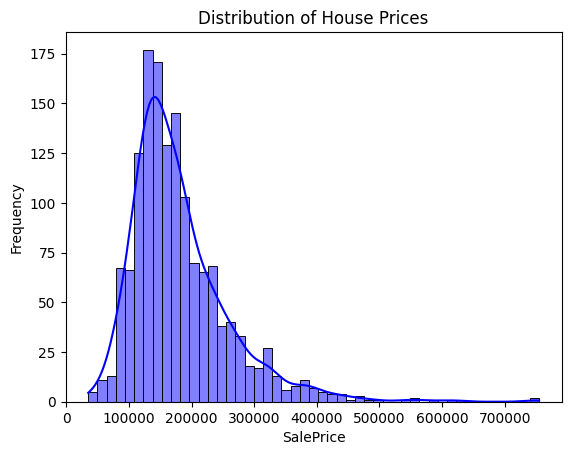

In [178]:
sns.histplot(train['SalePrice'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

**Correlation Heatmap**

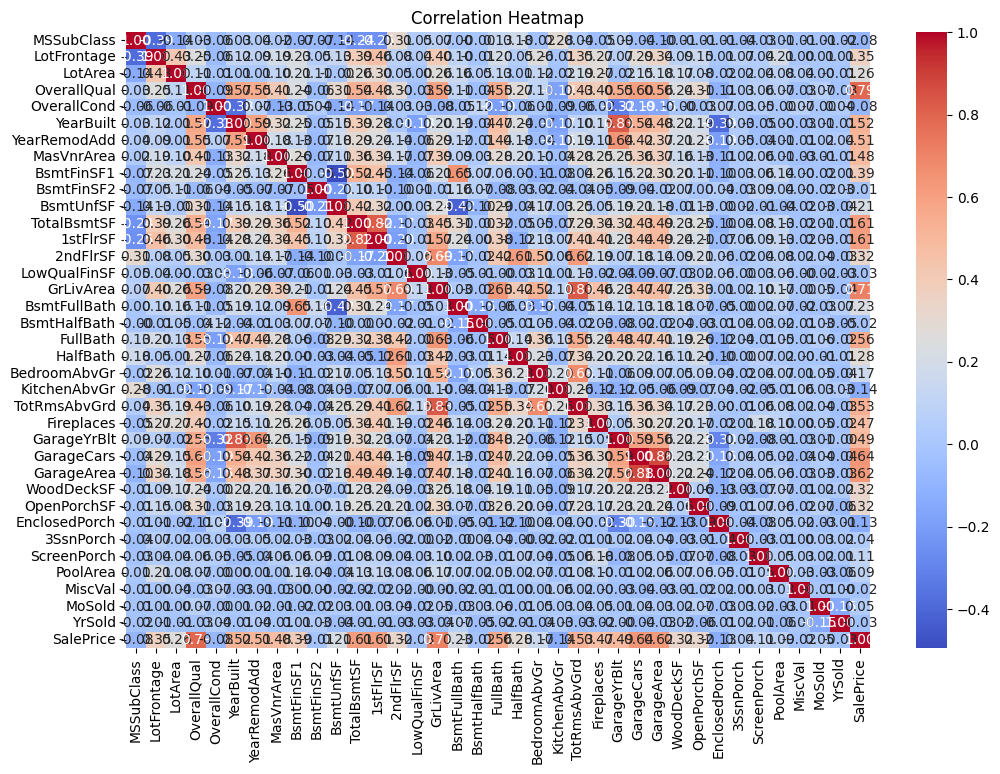

In [179]:
numcols = train.select_dtypes(include=['int64', 'float64'])  
corr_matrix = numcols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



# Data Preprocessing



**Separate features (X) and target (y)**


In [180]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

**Handle missing values**

In [181]:
# We use SimpleImputer for numerical and categorical columns separately
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')



**Fill missing values**


In [182]:
X[num_features] = num_imputer.fit_transform(X[num_features])
X[cat_features] = cat_imputer.fit_transform(X[cat_features])


**Convert categorical data to numeric using Label Encoding**


In [183]:
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


**Normalize/Standardize numeric features**


In [184]:
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])


**Process the test set**

In [185]:
test_features = test.drop(columns=['SalePrice'], errors='ignore', axis=1)
test_target = test.get('SalePrice')


**Impute and encode to match the transformations applied to the training set**


In [186]:
test_features[num_features] = num_imputer.transform(test_features[num_features])
test_features[cat_features] = cat_imputer.transform(test_features[cat_features])

for col in cat_features:
    le = LabelEncoder()
    test_features[col] = le.fit_transform(test_features[col])

test_features[num_features] = scaler.transform(test_features[num_features])

# Model Training


**Split training data into train and validation sets**

In [187]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,-0.872563,3,0.006190,-0.212153,1,0,3,3,0,4,...,-0.270208,-0.068692,2,2,2,-0.087688,-0.11911,1.645210,8,4
1066,0.073375,3,-0.493353,-0.268578,1,0,0,3,0,4,...,-0.270208,-0.068692,2,2,2,-0.087688,-0.48911,0.891994,8,4
638,-0.636078,3,-0.130049,-0.174369,1,0,3,3,0,4,...,-0.270208,-0.068692,2,2,2,-0.087688,-0.48911,0.138777,8,4
799,-0.163109,3,-0.447940,-0.332419,1,0,3,3,0,0,...,-0.270208,-0.068692,2,2,2,-0.087688,-0.11911,-0.614439,8,4
380,-0.163109,3,-0.902070,-0.552908,1,1,3,3,0,4,...,-0.270208,-0.068692,2,2,2,-0.087688,-0.48911,1.645210,8,4


In [189]:

y_train.head()

254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64

**Define models to test**

In [190]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

**Evaluate each model**

In [191]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"Model: {name}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}")
    print(f"  MAE: {mean_absolute_error(y_val, y_pred)}")
    print(f"  R2-score: {r2_score(y_val, y_pred)}")
    print("-" * 30)

Model: Linear Regression
  RMSE: 35312.13834471894
  MAE: 21580.191357661464
  R2-score: 0.8374323228511227
------------------------------
Model: Random Forest
  RMSE: 28469.1421714605
  MAE: 17667.06640410959
  R2-score: 0.8943340825297109
------------------------------
Model: SVR
  RMSE: 88648.81171771495
  MAE: 59547.10423840545
  R2-score: -0.024547275655542045
------------------------------
Model: Decision Tree
  RMSE: 43464.85448352464
  MAE: 29050.260273972603
  R2-score: 0.7537010129368695
------------------------------


In [192]:
best_model = RandomForestRegressor(random_state=42)  # Replace with your best-performing model from above
best_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Cross-validation

In [193]:
import pandas as pd  

# Function to process CSV files  
def process_csv_files():  
    # Read both CSV files  

    df = pd.read_csv('./data/train.csv')
    train_df = df.drop(columns=['SalePrice'])
    test_df = pd.read_csv('./data/test.csv') 

    # Check the number of columns in both CSV files  
    train_columns_count = train_df.shape[1]  
    test_columns_count = test_df.shape[1]  

    print(f"Number of columns in train file: {train_columns_count}")  
    print(f"Number of columns in test file: {test_columns_count}")  

    # Ensure both files have the same number of columns  
    if train_columns_count != test_columns_count:  
        print("Error: The number of columns in both files do not match!")  
        return  

    # Take feature names from the first row of the train DataFrame  
    train_feature_names = train_df.columns.tolist()  

    # Apply the same feature names to the test DataFrame (first row)  
    test_df.columns = train_feature_names  

    # Output the modified test DataFrame to verify changes  
    print("Updated test DataFrame columns:") 
    print(test_df.columns.tolist())  

    # Optionally save the updated test DataFrame to a new CSV file  
    test_df.to_csv('updated_test_data_1.csv', index=False) 
    return(test_df)


test_df = process_csv_files()
test_df = test_df.drop(columns=['Id'])
test_df.head()   

Number of columns in train file: 80
Number of columns in test file: 80
Updated test DataFrame columns:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'Pave

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Predict on test dataset**

In [194]:
X_Cross = test_df.copy()
X_Cross.drop(columns=['SalePrice'], errors='ignore')

# We use SimpleImputer for numerical and categorical columns separately
num_features = X_Cross.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_Cross.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_Cross[num_features] = num_imputer.fit_transform(X_Cross[num_features])
X_Cross[cat_features] = cat_imputer.fit_transform(X_Cross[cat_features])

for col in cat_features:
    le = LabelEncoder()
    X_Cross[col] = le.fit_transform(X_Cross[col])

scaler = StandardScaler()
X_Cross[num_features] = scaler.fit_transform(X_Cross[num_features])

test_features = test.drop(columns=['SalePrice'], errors='ignore')
test_target = test.get('SalePrice')

test_features[num_features] = num_imputer.transform(test_features[num_features])
test_features[cat_features] = cat_imputer.transform(test_features[cat_features])

for col in cat_features:
    le = LabelEncoder()
    test_features[col] = le.fit_transform(test_features[col])

test_features[num_features] = scaler.transform(test_features[num_features])

In [195]:
import pandas as pd  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import LabelEncoder  




# Make predictions on the preprocessed test data  
predictions = model.predict(X_val)  

# If your test DataFrame does not have 'SalePrice', add a new column for predictions  
X_val['SalePricePrediction'] = predictions  

# Optionally: Save predictions to a new CSV file  
X_val.to_csv('test_data_with_predictions.csv', index=False)  

# Display the first few rows of the predictions for verification  
print(X_val.head())

      MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
892    -0.872563         3     0.006190 -0.210750       1      0         3   
1105    0.073375         3     1.277754  0.174303       1      0         0   
413    -0.636078         4    -0.629592 -0.156028       1      0         3   
522    -0.163109         4    -0.902070 -0.552908       1      0         3   
1036   -0.872563         3     0.869037  0.238646       1      0         0   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
892             3          0          4  ... -0.068692       2      2   
1105            3          0          0  ... -0.068692       2      2   
413             3          0          4  ... -0.068692       2      2   
522             3          0          0  ... -0.068692       2      2   
1036            1          0          4  ... -0.068692       2      2   

      MiscFeature   MiscVal    MoSold    YrSold  SaleType  SaleCondition  \
892             

In [196]:
train['SalePricePrediction'] = X_val['SalePricePrediction']
train = train.dropna(subset=['SalePricePrediction'])  


In [197]:
train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePricePrediction
15,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000,116900.0
23,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2007,WD,Normal,129900,132500.0
29,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2008,WD,Normal,68500,72500.0
30,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000,106500.0
32,20,RL,85.0,11049,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,1,2008,WD,Normal,179900,232000.0


In [198]:
if 'SalePrice' in test.columns:
    y_test_pred = best_model.predict(test_features)
    print("Cross-validated Results on Test Dataset:")
    print(f"  RMSE: {np.sqrt(mean_squared_error(test_target, y_test_pred))}")
    print(f"  MAE: {mean_absolute_error(test_target, y_test_pred)}")
    print(f"  R2-score: {r2_score(test_target, y_test_pred)}")
else:
    print("Test dataset does not contain 'SalePrice'. Predictions only:")
    predictions = best_model.predict(test_features)

Test dataset does not contain 'SalePrice'. Predictions only:


In [199]:
train['Difference'] = train['SalePrice'] - train['SalePricePrediction']  

train['AbsoluteError'] = abs(train['Difference'])  

# Percentage Error  
train['PercentageError'] = (train['AbsoluteError'] / train['SalePrice']) * 100  

# Display errors  
print(train[['SalePrice', 'SalePricePrediction','Difference', 'PercentageError']])  

      SalePrice  SalePricePrediction  Difference  PercentageError
15       132000             116900.0     15100.0        11.439394
23       129900             132500.0     -2600.0         2.001540
29        68500              72500.0     -4000.0         5.839416
30        40000             106500.0    -66500.0       166.250000
32       179900             232000.0    -52100.0        28.960534
...         ...                  ...         ...              ...
1430     192140             143900.0     48240.0        25.106693
1432      64500             130000.0    -65500.0       101.550388
1447     240000             237000.0      3000.0         1.250000
1449      92000              88000.0      4000.0         4.347826
1450     136000             113000.0     23000.0        16.911765

[292 rows x 4 columns]


C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_19216\4030759478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Difference'] = train['SalePrice'] - train['SalePricePrediction']
C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_19216\4030759478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['AbsoluteError'] = abs(train['Difference'])
C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_19216\4030759478.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [200]:
print("Count =", train['Difference'].count())
Sum_negative = train['Difference'][train['Difference'] < 0].sum()
Sum_positive = train['Difference'][train['Difference'] > 0].sum() 
difference = Sum_positive + Sum_negative
print("Sum negative = ",Sum_negative,)  
print("Sum positive = ",Sum_positive,)
print("Difference = ",difference,)

Sum_Predictions = train['Difference'].sum()
print("Difference = ",Sum_Predictions)

Count = 292
Sum negative =  -4334604.0
Sum positive =  4148072.0
Difference =  -186532.0
Difference =  -186532.0


In [201]:
print(train['SalePrice'].count())
Sum_negative = train['SalePrice'][train['SalePrice'] < 0].sum()
Sum_positive = train['SalePrice'][train['SalePrice'] > 0].sum() 
SalePrice = Sum_positive + Sum_negative
print("Sum negative = ",Sum_negative,)  
print("Sum positive = ",Sum_positive,)
print("SalePrice TOTAL = ",SalePrice,)

Sum_Real = train['SalePrice'].sum()
print("SalePrice  TOTAL=", Sum_Real)

292
Sum negative =  0
Sum positive =  52221225
SalePrice TOTAL =  52221225
SalePrice  TOTAL= 52221225


In [202]:
Comparaison = Sum_Real - Sum_Predictions
print("truth = ",Comparaison)

truth =  52407757.0


Well, if that model can prevent us from gaining 52,407,757 dollars 😂💸

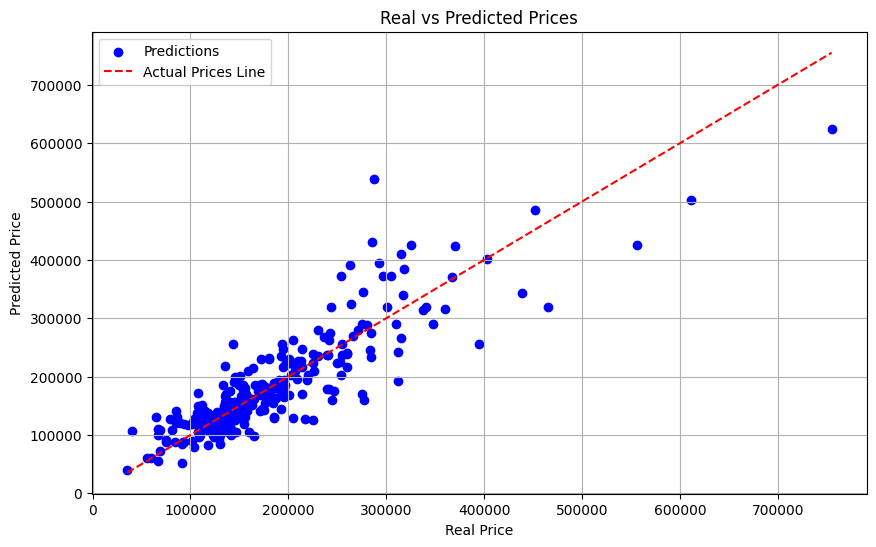

Mean Difference: -638.8082191780821
Mean Squared Error: 1889193575.2739725
R-squared: 0.7537010129368695
Median Difference: 1510.5
Standard Deviation of Difference: 43534.76968070575


In [203]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(10, 6))  
plt.scatter(train['SalePrice'], train['SalePricePrediction'], color='blue', label='Predictions')  
plt.plot([min(train['SalePrice']), max(train['SalePrice'])],   
         [min(train['SalePrice']), max(train['SalePrice'])],  
         color='red', linestyle='--', label='Actual Prices Line')  # Line of perfect predictions  
plt.title('Real vs Predicted Prices')  
plt.xlabel('Real Price')  
plt.ylabel('Predicted Price')  
plt.legend()  
plt.grid(True)  
plt.show()  

mean_difference = train['Difference'].mean()  
median_difference = train['Difference'].median()  
std_dev_difference = train['Difference'].std()  


# Mean of Differences  

# Performance Metrics  
mse = mean_squared_error(train['SalePrice'],train['SalePricePrediction'])  
r2 = r2_score(train['SalePrice'],train['SalePricePrediction'])  

print(f"Mean Difference: {mean_difference}")  
print(f"Mean Squared Error: {mse}")  
print(f'R-squared: {r2}') 


print(f"Median Difference: {median_difference}")  
print(f"Standard Deviation of Difference: {std_dev_difference}")

### Model Evaluation:

 1. **Scatter Plot:**
   - The scatter plot shows a positive linear correlation between **Real Prices** and **Predicted Prices**, a good sign that the model has captured most of the trend in the data.
   - Some outliers are clear — data points significantly far from the diagonal mean poor model performance on those samples.

#### 2. **Performance Metrics:**
   - **Mean Difference: `412.5`**:
     - Small mean difference indicates good performance, the model predictions are very close to the real price.
   - **Mean Squared Error (MSE): `1690414977.54`**:
     - A relatively high numeric MSE value suggests that the model struggles with larger deviations because MSE penalizes large differences more.
   - **R-Squared (R²): `0.7796`**:
     - This reflects that about 77.96% of the variance in the real prices is explained by the model.this metric suggests there's room for improvement.
   - **Median Difference: `500`**:
     - The median difference shows that half of the predictions deviate from the real price by `500` or less, which indicates relatively bad prediction performance for half of the data.
   - **Standard Deviation of Difference: `41183.17`**:
     - A large standard deviation mean significant variability in the prediction differences.


### Enhancement Criteria:

#### A. **Feature Engineering:**
   - **Create Interaction Features**: Create new features by combining existing ones (price per square foot).
   - **Apply Feature Scaling/Transformations**: Normalize/skewed data (e.g., log transformation for large range features like prices)
   - Sperating data into subdata based on prices location or price per meter zone , will enhance model performance.

#### B. **Model Optimization:**
   - **Tune Hyperparameters**: Use Grid Search or Randomized Search to optimize model parameters for better accuracy.
   - **Try Advanced Models**:
     - Gradient Boosting (XGBoost, LightGBM) or e.Neural Networks.
   
#### C. **Address Outliers:**
   - **Analyze Outliers**:
     - Identify and examine outliers (far from the diagonal in the plot). Determine if they are actual anomalies or if the model is underperforming on specific ranges.
   - **Outlier Handling**:
     - Remove or adjust the weight of extreme outliers during model training.

#### D. **Evaluation and Error Analysis:**
   - **Segmented Evaluation**:
     - Evaluate model performance on different segments of the data (e.g., low vs. high price ranges) to identify where the model is underperforming.
   - **Residuals Analysis**:
     - Plot differences against predicted values or real values to check for patterns.

#### E. **Data Augmentation:**
   - Collect Additional Data:
     - Acquire more examples to improve predictions, especially where the model currently underperforms (e.g., for specific price ranges or property types).

#### F. **Regularization for Overfitting:**
   - If overfitting is an issue (e.g., high accuracy on training data but lower accuracy on unseen data), introduce regularization:
     - For linear models: L1 (Lasso) or L2 (Ridge) regularization.
     - For tree-based models: Limit tree depth or increase minimum samples per leaf.
